In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

!mkdir "/kaggle/working/labels"
!cp -r "/kaggle/input/eye-dataset/Fam4a/Fam4a" "/kaggle/working/images"

# Dataset

In [2]:
imgs = os.listdir('/kaggle/working/images')
imgs_train, imgs_val = train_test_split(imgs, test_size=0.1)

df = pd.read_csv('/kaggle/input/eye-dataset/eye_annotation.csv')
df

xmin  ymin  xmax  ymax  name                                     file  \
0      325   151   439   191  eyes  2118863193_b5f1f22ecd_2387_20947166_N00   
1      515   178   654   215  eyes  2118863193_b5f1f22ecd_2387_20947166_N00   
2      173   438   281   474  eyes  2118863193_b5f1f22ecd_2387_20947166_N00   
3      666   488   776   530  eyes  2118863193_b5f1f22ecd_2387_20947166_N00   
4      419   218   471   241  eyes  1213947813_393bf4cb5a_1163_12048986_N08   
...    ...   ...   ...   ...   ...                                      ...   
1486   677   307   737   326  eyes  2616003726_663b9ae52e_3208_12368952_N06   
1487    78   207   102   216  eyes  2498501226_c39f3b951e_2112_26526176_N00   
1488   126   145   152   154  eyes  2498501226_c39f3b951e_2112_26526176_N00   
1489   167   137   193   147  eyes  2498501226_c39f3b951e_2112_26526176_N00   
1490   209   163   228   173  eyes  2498501226_c39f3b951e_2112_26526176_N00   

      width  height  class     Xcent     Ycent      boxW      boxH  
0      1024     819    NaN  0.373047  0.208791  0.111328  0.048840  
1      1024     819    NaN  0.570801  0.239927  0.135742  0.045177  
2      1024     819    NaN  0.221680  0.556777  0.105469  0.043956  
3      1024     819    NaN  0.704102  0.621490  0.107422  0.051282  
4      1024     768    NaN  0.434570  0.298828  0.050781  0.029948  
...     ...     ...    ...       ...       ...       ...       ...  
1486   1024     679    NaN  0.690430  0.466127  0.058594  0.027982  
1487    305     468    NaN  0.295082  0.451923  0.078689  0.019231  
1488    305     468    NaN  0.455738  0.319444  0.085246  0.019231  
1489    305     468    NaN  0.590164  0.303419  0.085246  0.021368  
1490    305     468    NaN  0.716393  0.358974  0.062295  0.021368  

[1491 rows x 13 columns]

In [3]:
df = df.drop("class", axis=1)
df

xmin  ymin  xmax  ymax  name                                     file  \
0      325   151   439   191  eyes  2118863193_b5f1f22ecd_2387_20947166_N00   
1      515   178   654   215  eyes  2118863193_b5f1f22ecd_2387_20947166_N00   
2      173   438   281   474  eyes  2118863193_b5f1f22ecd_2387_20947166_N00   
3      666   488   776   530  eyes  2118863193_b5f1f22ecd_2387_20947166_N00   
4      419   218   471   241  eyes  1213947813_393bf4cb5a_1163_12048986_N08   
...    ...   ...   ...   ...   ...                                      ...   
1486   677   307   737   326  eyes  2616003726_663b9ae52e_3208_12368952_N06   
1487    78   207   102   216  eyes  2498501226_c39f3b951e_2112_26526176_N00   
1488   126   145   152   154  eyes  2498501226_c39f3b951e_2112_26526176_N00   
1489   167   137   193   147  eyes  2498501226_c39f3b951e_2112_26526176_N00   
1490   209   163   228   173  eyes  2498501226_c39f3b951e_2112_26526176_N00   

      width  height     Xcent     Ycent      boxW      boxH  
0      1024     819  0.373047  0.208791  0.111328  0.048840  
1      1024     819  0.570801  0.239927  0.135742  0.045177  
2      1024     819  0.221680  0.556777  0.105469  0.043956  
3      1024     819  0.704102  0.621490  0.107422  0.051282  
4      1024     768  0.434570  0.298828  0.050781  0.029948  
...     ...     ...       ...       ...       ...       ...  
1486   1024     679  0.690430  0.466127  0.058594  0.027982  
1487    305     468  0.295082  0.451923  0.078689  0.019231  
1488    305     468  0.455738  0.319444  0.085246  0.019231  
1489    305     468  0.590164  0.303419  0.085246  0.021368  
1490    305     468  0.716393  0.358974  0.062295  0.021368  

[1491 rows x 12 columns]

In [4]:
%%time
import yaml
cwd = '/kaggle/working/'
data = dict(
    train =  cwd + 'train.txt',
    val   =  cwd + 'val.txt',
    nc    = 1,
    names = ['eyes'],
)

with open(cwd + 'bgr.yaml', 'w') as outfile:
    yaml.dump(data, outfile, default_flow_style=False)
with open(cwd + 'train.txt', 'w') as f:
    for path in imgs_train:
        f.write(cwd+'images/'+path+'\n')
with open(cwd + 'val.txt', 'w') as f:
    for path in imgs_val:
        f.write(cwd+'images/'+path+'\n')

CPU times: user 14.4 ms, sys: 6.96 ms, total: 21.4 ms
Wall time: 21.4 ms


In [5]:
for file in imgs:
    file = file.split('.')[0]
    bboxs = []
#     print(file)
    for _,row in df[df['file'] == file].iterrows():
        bbox = [str(0), str(row['Xcent']), str(row['Ycent']), str(row['boxW']), str(row['boxH'])]
        bbox = ' '.join(bbox)
        bboxs.append(bbox)
    with open(cwd+'labels/'+file+'.txt', 'w') as f:
        bboxs = '\n'.join(bboxs)
        f.write(bboxs)


In [6]:
bboxs

'0 0.357 0.1166219839142091 0.058 0.0294906166219839\n0 0.315 0.3190348525469169 0.058 0.0268096514745308\n0 0.66 0.2694369973190348 0.056 0.0402144772117962\n0 0.574 0.2788203753351206 0.044 0.0214477211796246'

In [7]:
# %cd /kaggle/working

In [8]:
# os.listdir("labels")

# YOLOv5

In [9]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4095.2/8062.4 GB disk)


# Train

In [10]:
%%time
!python train.py --img 1280\
--batch 8\
--epochs 50\
--data /kaggle/working/bgr.yaml\
--weights yolov5s.pt

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/bgr.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentu

# Visualize

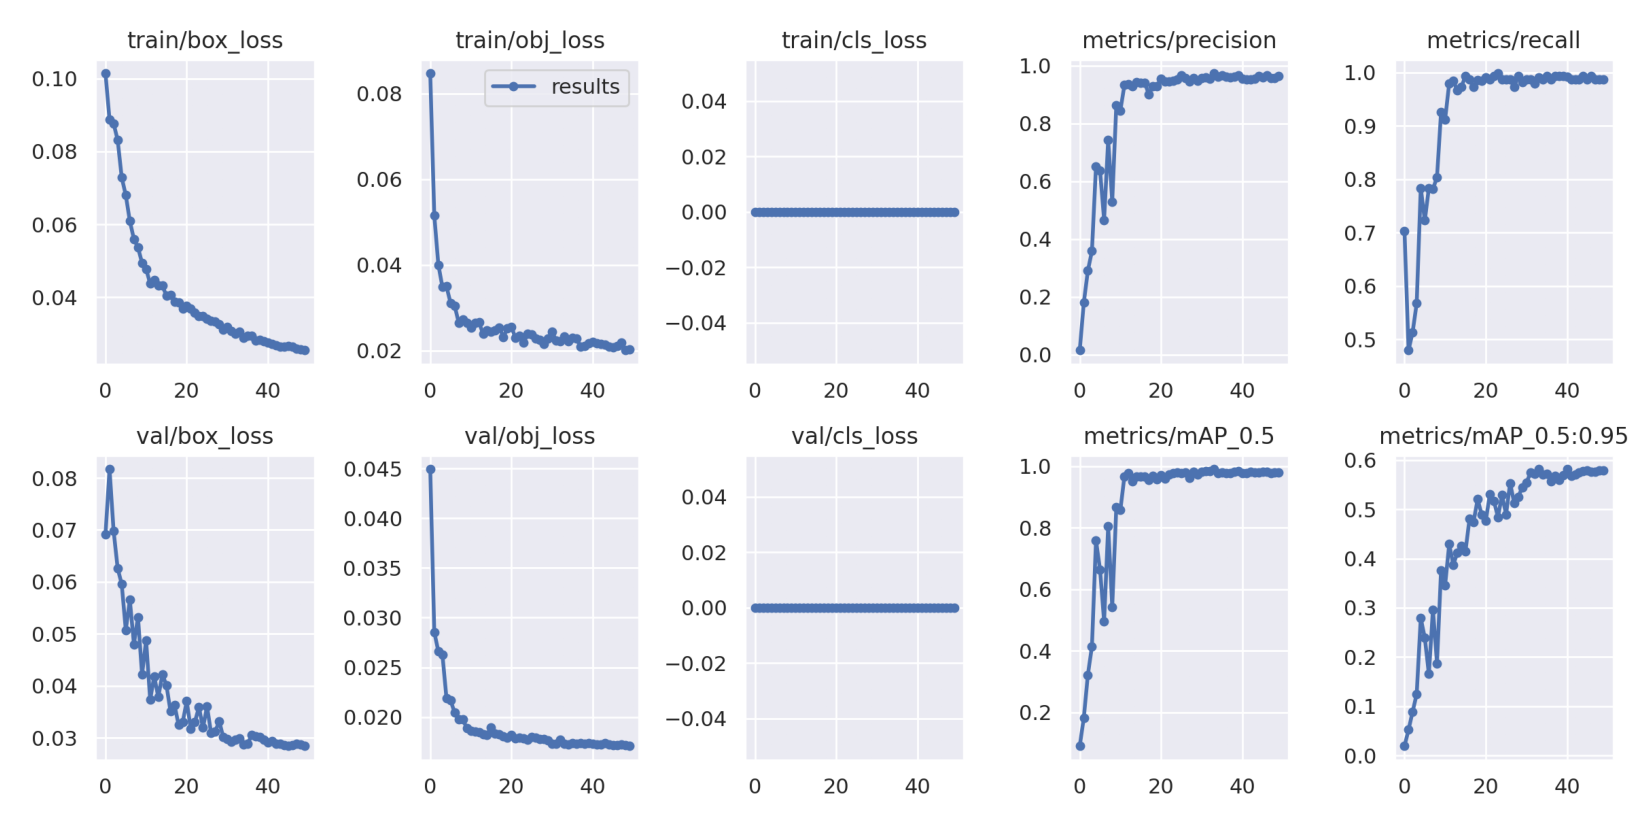

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(plt.imread('/kaggle/working/yolov5/runs/train/exp/results.png'))


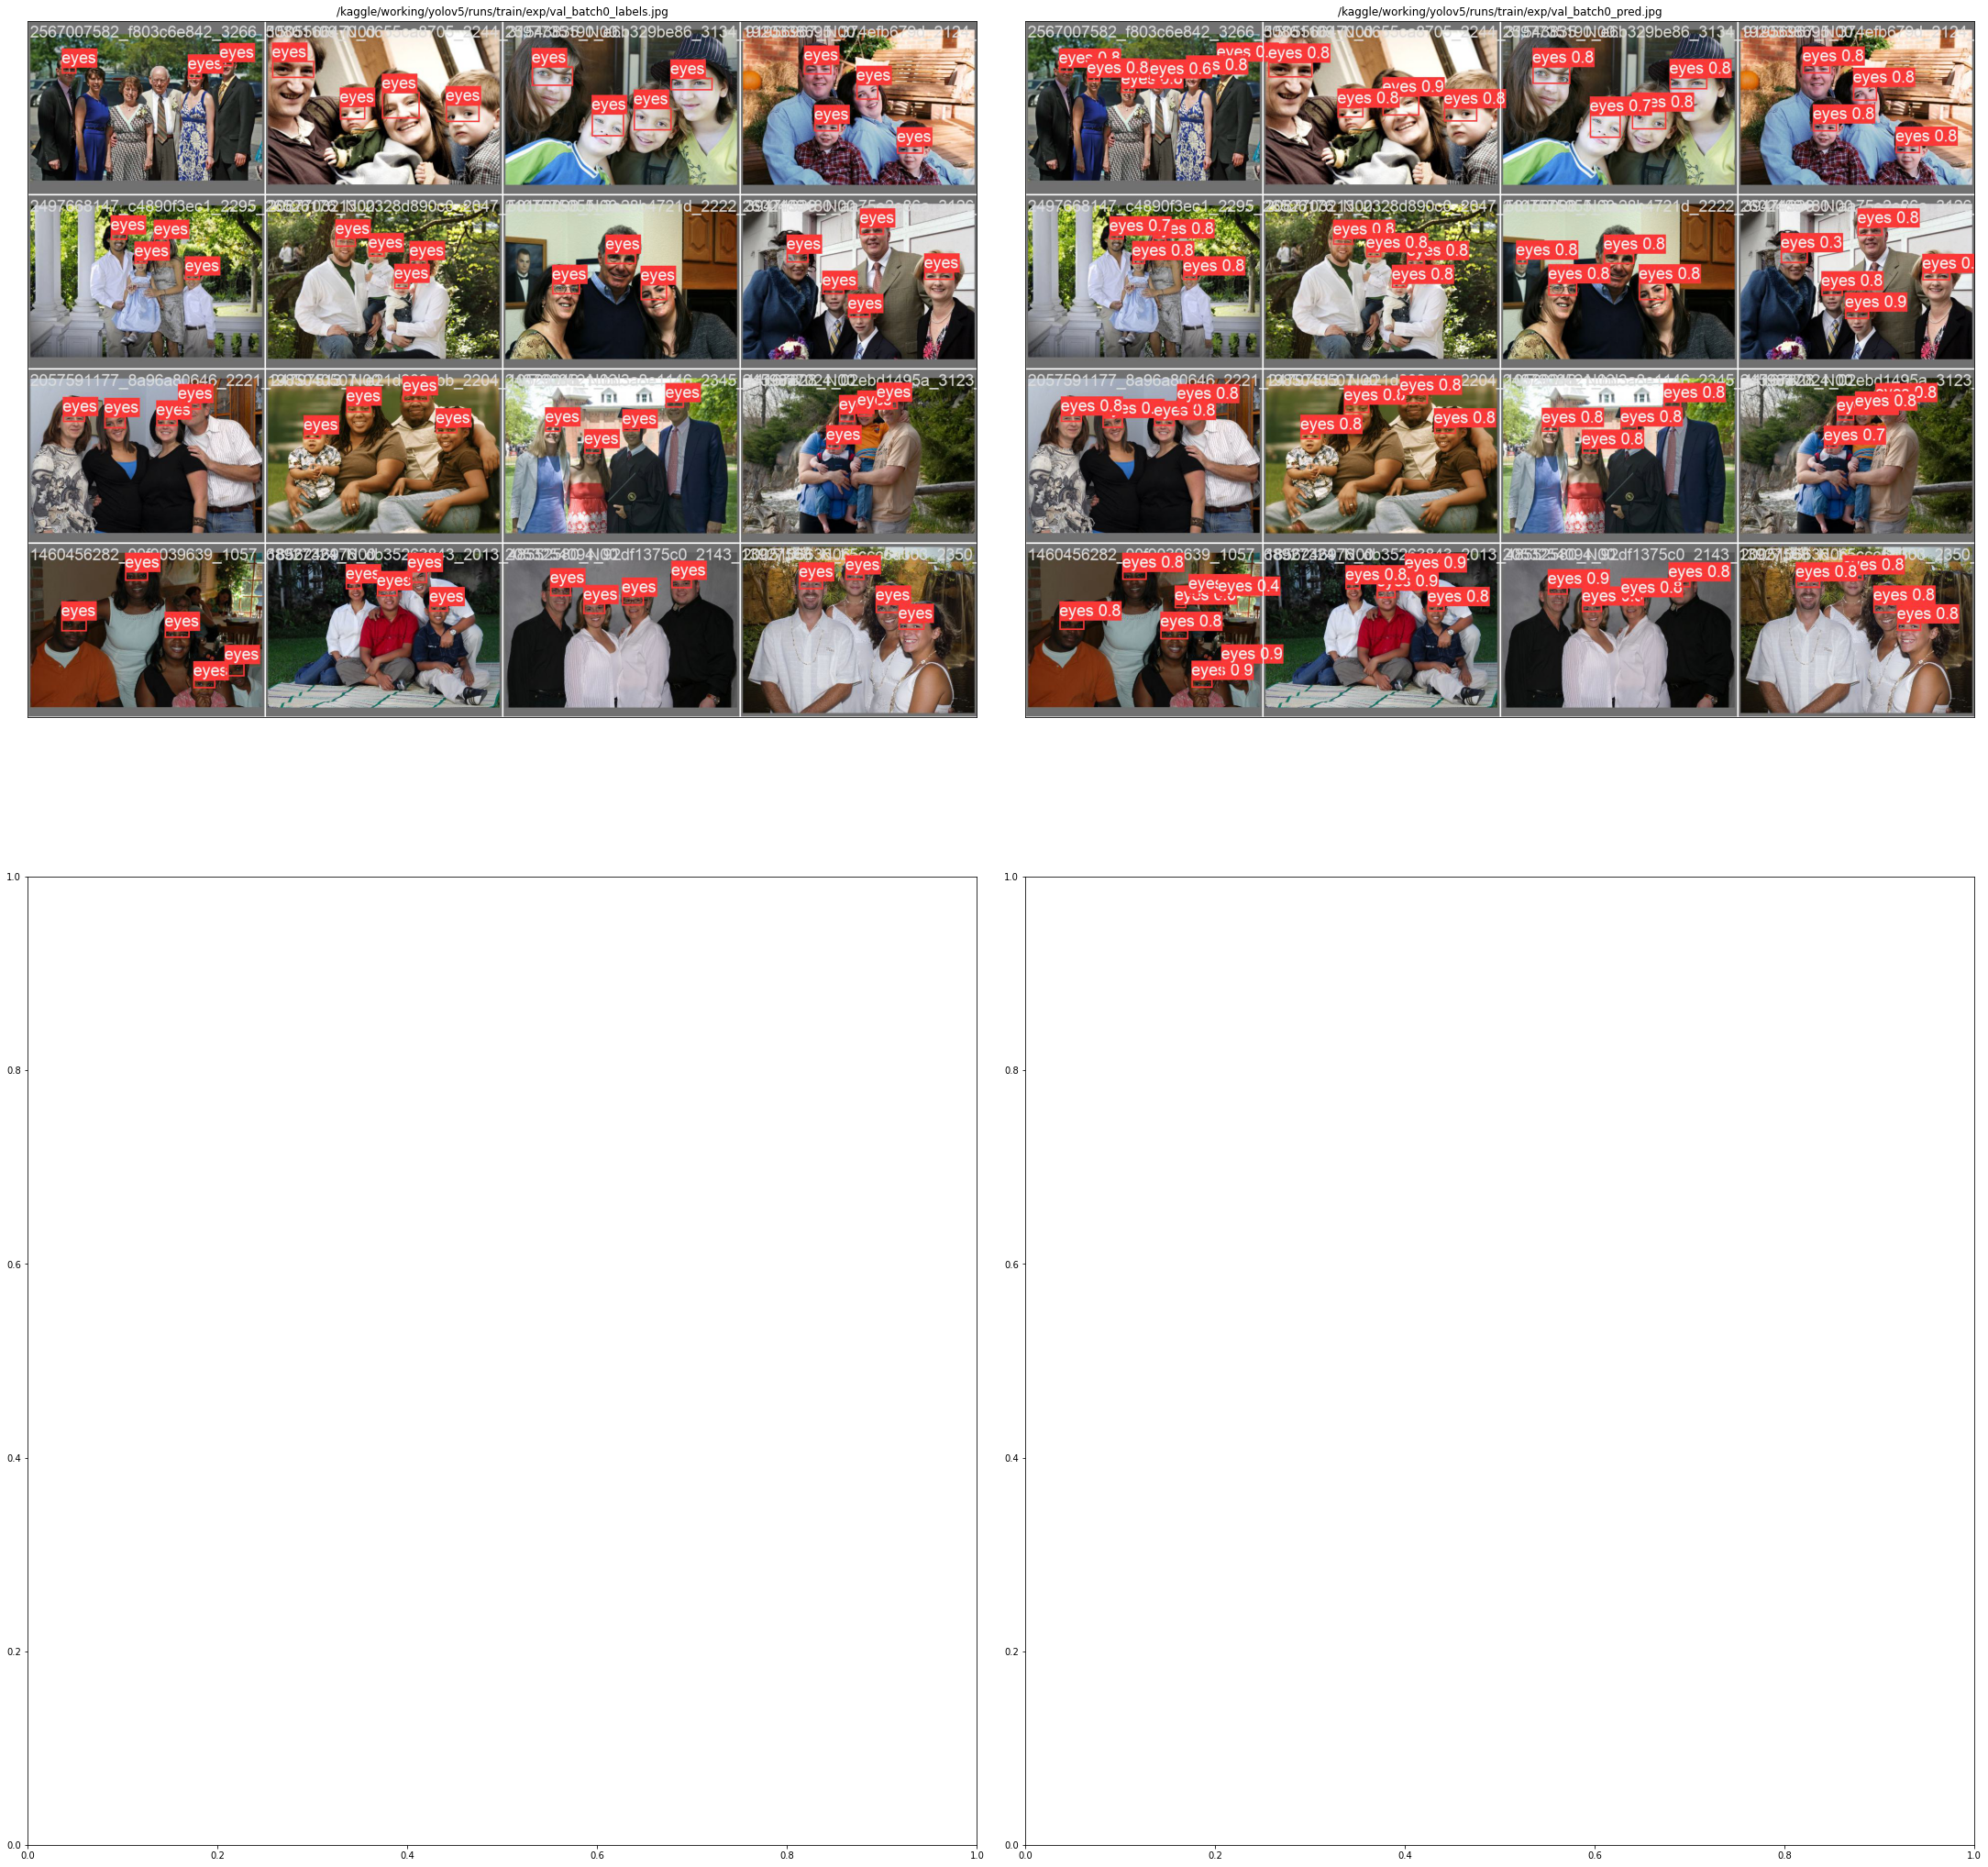

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (30,30), constrained_layout = True)
for row in range(1):
    ax[row][0].imshow(plt.imread(f'/kaggle/working/yolov5/runs/train/exp/val_batch{row}_labels.jpg'))
    ax[row][0].set_xticks([])
    ax[row][0].set_yticks([])
    ax[row][0].set_title(f'/kaggle/working/yolov5/runs/train/exp/val_batch{row}_labels.jpg', fontsize = 12)
    
    ax[row][1].imshow(plt.imread(f'/kaggle/working/yolov5/runs/train/exp/val_batch{row}_pred.jpg'))
    ax[row][1].set_xticks([])
    ax[row][1].set_yticks([])
    ax[row][1].set_title(f'/kaggle/working/yolov5/runs/train/exp/val_batch{row}_pred.jpg', fontsize = 12)
plt.show()

# Predict

In [13]:
import torch
from PIL import Image

CKPT_PATH = '/kaggle/working/yolov5/runs/train/exp/weights/best.pt'
yolov5 = torch.hub.load('/kaggle/working/yolov5','custom',path=CKPT_PATH,source='local',force_reload=True)

'confidence: ' + str(yolov5.conf)

YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


'confidence: 0.25'

In [14]:
%cd /kaggle/working

/kaggle/working


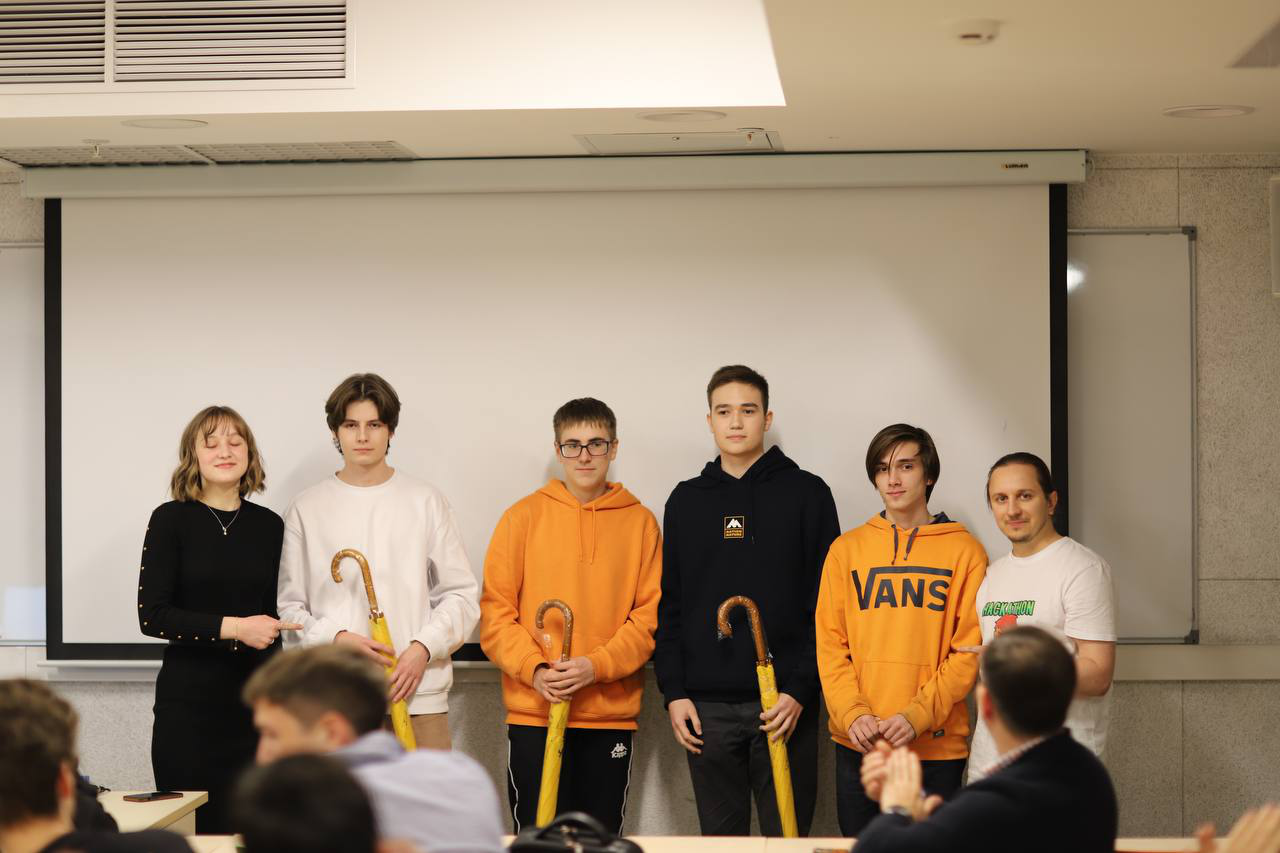

In [16]:
from PIL import Image
img_test = Image.open("/kaggle/input/my-test-img/photo_2022-11-22_19-21-29.jpg")
img_test

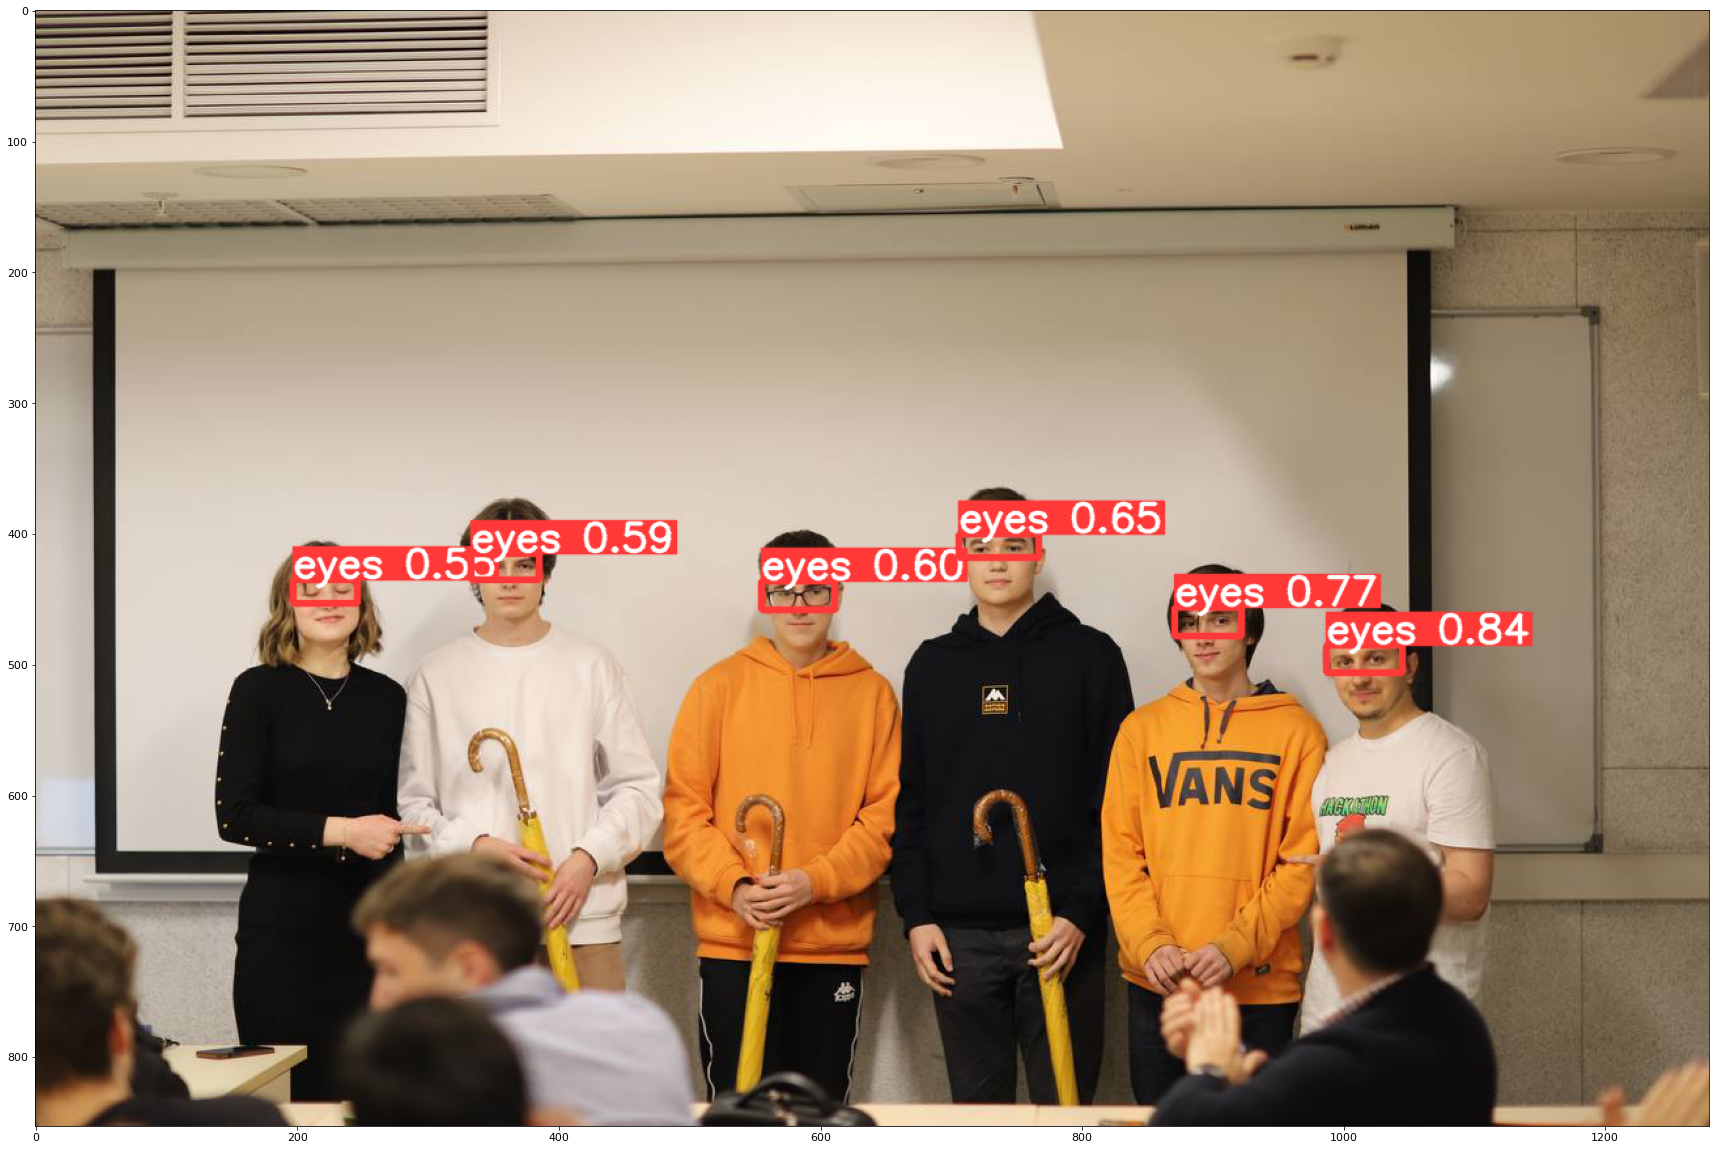

In [17]:
results = yolov5("/kaggle/input/my-test-img/photo_2022-11-22_19-21-29.jpg")
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(results.render()[0])
plt.show()

In [18]:
import cv2
predict_image = yolov5(["/kaggle/input/my-test-img/photo_2022-11-22_19-21-29.jpg"])
predict_image = predict_image.xyxy[0].data.cpu().numpy().tolist()
predict_image

[[987.7180786132812,
  485.3032531738281,
  1045.35986328125,
  506.433349609375,
  0.8396956324577332,
  0.0],
 [871.8838500976562,
  456.0786437988281,
  922.6404418945312,
  478.1117858886719,
  0.7739386558532715,
  0.0],
 [706.7596435546875,
  400.05718994140625,
  767.371337890625,
  418.8836669921875,
  0.6498349905014038,
  0.0],
 [555.8814697265625,
  436.0732116699219,
  611.00439453125,
  458.4490661621094,
  0.5987788438796997,
  0.0],
 [333.2507019042969,
  415.3674621582031,
  385.9352722167969,
  435.9573059082031,
  0.590929388999939,
  0.0],
 [197.92391967773438,
  435.5421142578125,
  246.5194091796875,
  453.05426025390625,
  0.5548377633094788,
  0.0]]